In [1]:
import warnings
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import pytse_client as tse

In [2]:
TRAINING_PERCENTAGE = 0.7
TESTING_PERCENTAGE = 1 - TRAINING_PERCENTAGE
NUMBER_OF_PREVIOUS_DATA_POINTS = 3
LENGTH_DATA_SET = 0
TRAINING_SET_LENGTH = 0
TESTING_SET_LENGTH = 0

In [3]:
def training_testing_buckets(raw_data, training_percentage, testing_percentage):
    global TRAINING_SET_LENGTH, TESTING_SET_LENGTH
    TRAINING_SET_LENGTH = int(LENGTH_DATA_SET * training_percentage)
    TESTING_SET_LENGTH = LENGTH_DATA_SET - TRAINING_SET_LENGTH
    training_set, testing_set = raw_data[0:TRAINING_SET_LENGTH], raw_data[TRAINING_SET_LENGTH:LENGTH_DATA_SET]
    return training_set, testing_set

In [4]:
def evaluate_performance_arima(testing_actual, testing_predict):
    counter = 0
    for i in range(len(testing_actual)-1):
        predict=testing_predict[i+1]- testing_predict[i]
        actual = testing_actual[i+1]-testing_actual[i]
        if (actual > 0 and predict > 0) or (actual < 0 and predict < 0):
            counter+=1
    counter = round((counter / (len(testing_actual)-1))*100,2)
    return counter
    # return mean_squared_error(testing_actual, testing_predict)

In [5]:
def plot_arima(currency, testing_actual, testing_predict):
    actual = pyplot.plot(testing_actual, label="Actual data points", color="blue")
    testing = pyplot.plot(testing_predict, label="Testing prediction", color="green")
    pyplot.ylabel('currency values for 1 stock')
    pyplot.xlabel('number of days')
    pyplot.title( currency + ' : actual vs predicted ')
    pyplot.legend()
    pyplot.show()
    pyplot.clf()

In [6]:
def load_data_set(currency):
    tse.download(symbols=stock_name)
    ticker = tse.Ticker(stock_name)
    data = ticker.history
    raw_data = data.close.values.tolist()
    global LENGTH_DATA_SET
    LENGTH_DATA_SET = len(raw_data)
    return raw_data

In [7]:
def build_model_predict_arima(training_set, testing_set):
    testing_predict = list()
    training_predict = list(training_set)
    for testing_set_index in range(TESTING_SET_LENGTH):
        arima = ARIMA(training_predict, order=(5, 1, 0))
        arima_model = arima.fit(disp=0)
        forecasting = arima_model.forecast()[0].tolist()[0]
        testing_predict.append(forecasting)
        training_predict.append(testing_set[testing_set_index])
        # print("Predicted = ", testing_predict[-1], "Expected = ", testing_set[testing_set_index])
    print('predicting...')
    print("---------------------------")
    forcast = arima_model.forecast()[0]
    print('The prediction for the next day:', forcast)
    if forcast- testing_set[-1] > 0 : print("last result = +1")
    else :  print("last result = -1")
    print("---------------------------")
    return testing_predict

In [8]:
def arima_model(currency):
    print('\nARIMA Model')

    print('loading the dataset...')
    raw_data = load_data_set(currency)

    print('splitting training and testing set...')
    training_actual_arima, testing_actual_arima = training_testing_buckets(raw_data, TRAINING_PERCENTAGE,
                                                                           TESTING_PERCENTAGE)

    print('building and training model...')
    testing_predict_arima = build_model_predict_arima(training_actual_arima, testing_actual_arima)

    print('evaluating performance...')
    mse_arima = evaluate_performance_arima(testing_actual_arima, testing_predict_arima)
    print('Testing Accuracy: ', mse_arima,"%")

    print("------------------------")
    print('plotting the graph...')
    plot_arima(currency, testing_actual_arima, testing_predict_arima)

    print('done...')
    return raw_data, testing_predict_arima


ARIMA Model
loading the dataset...
splitting training and testing set...
building and training model...
predicting...
---------------------------
The prediction for the next day: [18570.16156483]
last result = +1
---------------------------
evaluating performance...
Testing Accuracy:  56.47 %
------------------------
plotting the graph...


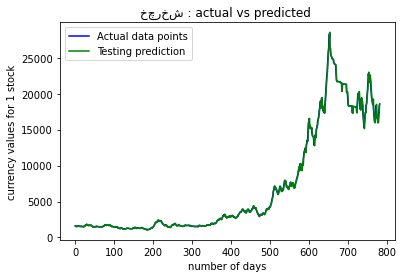

done...


<Figure size 432x288 with 0 Axes>

In [9]:
if __name__ == '__main__':
    warnings.filterwarnings("ignore")
    # stock_name = input('Enter stock name:')
    stock_name = 'خچرخش'
    arima_model(stock_name)  # setting the entry point